In [1]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Age, Department)
#Standardization of each value(Gender)
#Concatenate First Name and Last Name
#Add a new column(YearsAtCompany)
#STrength by Maritial Status

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [67]:
pd.reset_option("display.max_rows",None)
df = pd.read_csv("Sample_HR.csv")


# df =  df[df.duplicated()].shape[0]
df = df.drop_duplicates()

# df = df[df['Age'].isnull()]

Average_age = int(df['Age'].mean())
df["Age"] = df["Age"].fillna(Average_age)

# df = df[df["Age"].isnull()]
df["Department"] =  df["Department"].fillna('Data Engineering')

# df = df[df["Department"] == "Data Engineering"]
# df.query("Department == 'TECH'")

df["Gender"] = df["Gender"].replace({"M":"Male","F":"Female"})
df["Full Name"] =  df["First Name"] + " " +df["Last Name"]

columns = df.columns.tolist()
last_name_index  = columns.index("Last Name")
columns.insert(last_name_index + 1,columns.pop(columns.index("Full Name")))
df = df[columns]
df = df.drop("YearsAtCompany",axis = 1)

# Get the no of experience
hire_date = pd.to_datetime(df["Hire_Date"]).dt.year
current_date = datetime.now().year
df["YearsAtCompany"] =  current_date - hire_date

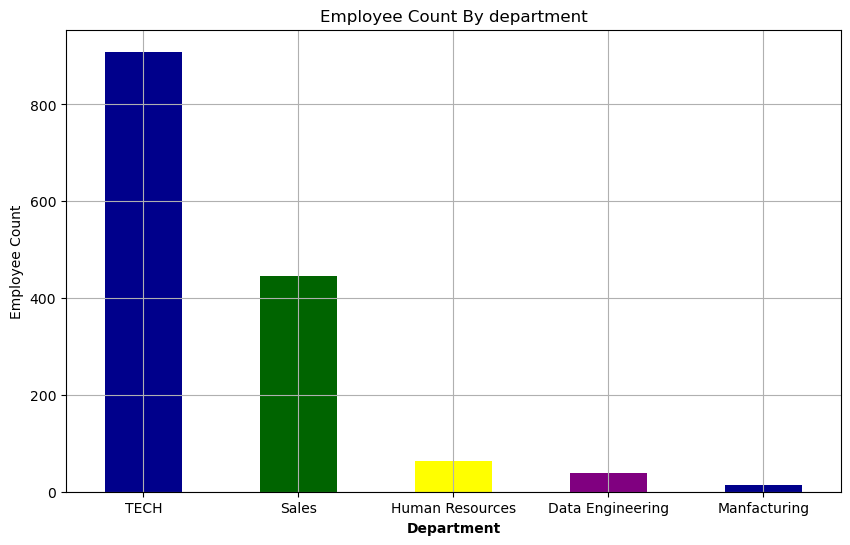

In [99]:
# Visualization

department_count = df["Department"].value_counts()
plt.figure(figsize = (10,6))
color = ['darkblue','darkgreen','yellow','purple' ]
department_count.plot(kind = 'bar', color = color)
plt.title("Employee Count By department")
plt.xlabel("Department", fontweight =  'bold')
plt.ylabel("Employee Count", fontweight =  'bold')
plt.xticks(rotation = 0)
plt.grid()
plt.show()